<a href="https://colab.research.google.com/github/arvitorino/Python/blob/master/Comandos_b%C3%A1sicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from numpy.random import randn

In [0]:
# Instalando pacotes no jupyter/colab
!pip install <nome do pacote>

### Loading Data

In [0]:
# Importando arquivos

pd.read_excel('Path do arquivo/nome_arquivo.xlsx')
pd.read_csv('Path do arquivo/nome_arquivo.csv')

### Configurações

In [0]:
# Alterando diretório dos arquivos.

import os

# Escolhendo o diretório
os.chdir("C:\\")

In [0]:
# Alterando a configuração de decimais do tipo float no PANDAS
pd.options.display.float_format = '{:.3f}'.format 

### Data Frame

#### Criando Data Frame

In [0]:
#Criando uma data frame como exemplo

df = pd.DataFrame({'Card':list('baaaaa'),
                   'Rand':randn(6),
                   'Date':['2017-10-01'] * 6,
                   'Heure':[1,3,5,7,1,None],
                   'Type':[5,5,5,9,5,9],
                   'member':list('aaabbb')})

#### Básicos

In [0]:
# Tamanho da sua base de dados
df.shape

In [0]:
# Descritivo da suas varíaveis numéricas
df.describe()

In [0]:
# 
display(df.head())

In [0]:
# Informações básicas do data frame
df.info()

In [0]:
# Visualizando colunas

df[['Card', 'member']]

In [0]:
# Renomeado colunas
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

#### Converção tipo de dados

In [0]:
# Convertendo em float
df['COLUM_NAME'] = df.COLUM_NAME.astype(float)

#### Trantando Valores Nulos

In [0]:
# Retonar linhas com valores nulos
df[df.isnull().any(axis=1)]

In [0]:
# Eliminando as linhas que contém valores nulos
df.dropna() 

In [0]:
# Preechendo os valores nulos (Nan)
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                    [3, 4, np.nan, 1],
                    [np.nan, np.nan, np.nan, 5],
                    [np.nan, 3, np.nan, 4]],
                    columns=list('ABCD'))

values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df.fillna(value=values)

#### Dropar colunas/linhas

In [0]:
# Deletando a coluna 0
df.drop(df.columns[[0]], axis=1)

# Deletando a coluna 0 e 1
df.drop(df.columns[[0,1]], axis=1, inplace = True) # inplace vai substituir o o df atual

# Usando o nome da coluna
df.drop(['coluna1','coluna2'], axis=1, inplace = True) # inplace vai substituir o o df atual

In [0]:
# Dropando linhas especfícas utilizando index

i = df.loc[df.index == 2].index
df.drop(i) 

#### Localizando elementos 

In [0]:
# Procurando um valor por index
df.loc[df.index == 2]

In [0]:
# Localizando valores dos indíces 0 a 2 das colunas 'Card' e 'member'
# Use o loc para nomes das colunas e nome dos índices

df.loc[ 0:2, ['Card', 'member']]

,Card,member
0,b,a
1,a,a
2,a,a


In [0]:
# Localizando valores dos indíces 0 a 2
# use o iloc para índices

df.iloc[0:2]

,Card,Date,Heure,Rand,Type,member
0,b,2017-10-01,1.0,0.144044,5,a
1,a,2017-10-01,3.0,1.454274,5,a


#### Filtrando e comparando

In [0]:
# Filtrando
df[df['Rand']>1]

,Card,Date,Heure,Rand,Type,member
1,a,2017-10-01,3.0,1.454274,5,a


In [0]:
# Filtrando e selecionando apenas uma coluna
df[df['Heure']>1]['Date']

1    2017-10-01
2    2017-10-01
3    2017-10-01
Name: Date, dtype: object

In [0]:
# Comparando usando AND
df[(df['Heure']>1) & (df['Rand']>1) ]

,Card,Date,Heure,Rand,Type,member
1,a,2017-10-01,3.0,1.454274,5,a


In [0]:
# Comparando usando OR
df[(df['Heure']>1) | (df['Rand']>1) ]

,Card,Date,Heure,Rand,Type,member
1,a,2017-10-01,3.0,1.454274,5,a
2,a,2017-10-01,5.0,0.761038,5,a
3,a,2017-10-01,7.0,0.121675,9,b


#### Reset index

In [0]:
df.reset_index()

,index,Card,Date,Heure,Rand,Type,member
0,0,b,2017-10-01,1.0,0.144044,5,a
1,1,a,2017-10-01,3.0,1.454274,5,a
2,2,a,2017-10-01,5.0,0.761038,5,a
3,3,a,2017-10-01,7.0,0.121675,9,b
4,4,a,2017-10-01,1.0,0.443863,5,b
5,5,a,2017-10-01,NaN,0.333674,9,b


In [0]:
df.set_index('Rand')

,Card,Date,Heure,Type,member
Rand,,,,,
0.144044,b,2017-10-01,1.0,5,a
1.454274,a,2017-10-01,3.0,5,a
0.761038,a,2017-10-01,5.0,5,a
0.121675,a,2017-10-01,7.0,9,b
0.443863,a,2017-10-01,1.0,5,b
0.333674,a,2017-10-01,NaN,9,b


In [0]:
# Existem tb:

# Níveis de Índice
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

df.xs

#### Joins

In [0]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [0]:
# Union all
pd.concat([df1,df2,df3],axis=0)

In [0]:
# Join all
pd.concat([df1,df2,df3],axis=1)

In [0]:
# Inner (default)
pd.merge(df1,df2,how='inner',on='key')

# Outro método

df1.join(df2)

In [0]:
# Outer
pd.merge(df1, df2, how='outer', on=['key1', 'key2'])

# Outro método

df1.join(df2, how='outer')

In [0]:
# Join Right
pd.merge(df1, df2, how='right', on=['key1', 'key2'])

In [0]:
# Join Left
pd.merge(df1, df2, how='left', on=['key1', 'key2'])

#### Lista

In [0]:
#Transformando uma coluna em lista

df["Card"].tolist()

['b', 'a', 'a', 'a', 'a', 'a']

#### Date



#### Operações

In [0]:
# Valores únicos

df['Card'].nunique()

df['Card'].value_counts()

df['Card'].count()

a    5
b    1
Name: Card, dtype: int64

# Outros

In [0]:
# Caso não consiga converte um objeto em data utilize:

df['teste'] = df['NOME_COLUNA'].apply(pd.to_datetime, errors='coerce')
print(df[df.teste.isnull()])

# Ele irá retornar as linhas que estão com erro e não correspondem ao formarto correto

In [0]:
dtypes = {'CD_CLIENTE': 'str', 'CD_COMPRA': 'str', 'CD_PRODUTO': 'str', 'VL_UNITARIO': 'int', 'VL_DESCONTO': 'float', 'QTD_SAIDA': 'int'}
https://stackoverflow.com/questions/21269399/datetime-dtypes-in-pandas-read-csv

# Funções prontas

In [0]:
# Buscar missing values e retorna uma tabela resumo

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = df.isnull().sum() / len(df) * 100
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns

missing_values_table(df)

# Gráficos

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [0]:
df = pd.DataFrame({'Type':list('AAAABB'),
                   'Value_A':randn(6),
                   'Value_B':[1,3,5,7,1,8],                  
                   'Date':['2017-10-01']*6
                  })


In [0]:
df

,Type,Value_A,Value_B,Date
0,A,0.812220,1.0,2017-10-01
1,A,-1.769669,3.0,2017-10-01
2,A,0.811668,5.0,2017-10-01
3,A,0.746811,7.0,2017-10-01
4,B,-0.887362,1.0,2017-10-01
5,B,0.218713,NaN,2017-10-01


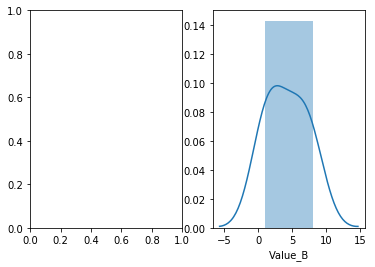

In [0]:
# Visualizar mais de um gráfico

fig, ax = plt.subplots(1,2)

sns.distplot(df['Value_B'])
